<a href="https://colab.research.google.com/github/viktoruebelhart/studies/blob/main/01_Pytorch_workflow_Bourke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resorces:
* Ground truth notebook
* PyTorch Workflow
* Ask a question

In [1]:
what_were_covering = {1: 'data(prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data(training)',
                      4: 'making predictions and evaluating a model(inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}

what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of Pytoch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.5.1+cu121'

## Data (preparing and Loading)

Data can be almost anything ... in machine learning.

* Excel
* Images
* Videos
* Audio
* DNA
* Text

Machine Learning is a game of two parts:

1. Get data into a numerical representation
2. Build a model to learning patterns in that numerical representation



In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing set
train_split

40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

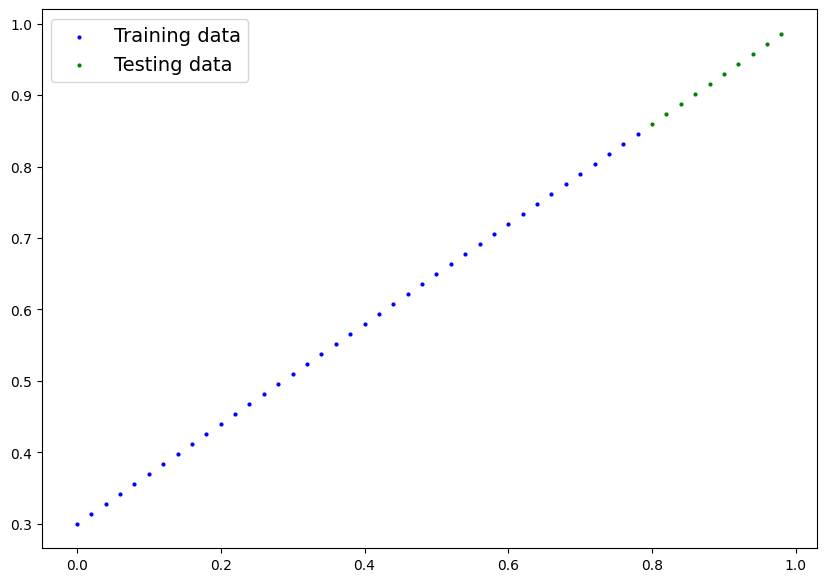

In [9]:
plot_predictions();

## Build model

Our first PyTorch model

In [ ]:
# Create linear regression model class
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)